In [1]:
#from bs4 import BeautifulSoup as BS
#county = look_up.iloc[i]['Zone']
#text = requests.get('https://www.google.com/maps/place/'+county.split()[0]+',+New+York').text
#soup = BS(text)
#location = soup.find('meta',{"property": "og:image"})['content']
#idx = location.find('ll')

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as BS
import requests
yellow = pd.read_csv('yellow_tripdata_2018-01.csv')
look_up = pd.read_csv('taxi_zone_lookup.csv')

In [2]:
# set the coordinate system to 'epsg:4326', which is latitude and longitude coordinates.
import geopandas as gpd
coord_system = {'init': 'epsg:4326'}
shapefile = gpd.read_file("taxi_zones.shp").to_crs(coord_system)
shapefile = shapefile.drop(['Shape_Area', 'Shape_Leng', 'OBJECTID'], axis=1)

In [3]:
shapefile.head()

,zone,LocationID,borough,geometry
0,Newark Airport,1,EWR,"POLYGON ((-74.18445299999998 40.6949959999999,..."
1,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260664 40.6389870471767...
2,Allerton/Pelham Gardens,3,Bronx,POLYGON ((-73.84792614099986 40.87134223399993...
3,Alphabet City,4,Manhattan,"POLYGON ((-73.9717741096532 40.72582128133706,..."
4,Arden Heights,5,Staten Island,POLYGON ((-74.17421738099991 40.56256808599989...


In [4]:
shapefile.geometry[3].exterior.coords.xy

(array('d', [-73.9717741096532, -73.97179142961487, -73.97181650587733, -73.97185935830925, -73.97187437695214, -73.97188490951474, -73.97191120732056, -73.97193374501083, -73.97193975456331, -73.97196154778594, -73.97200511841214, -73.97203666966882, -73.97206595867398, -73.9720719696034, -73.97208098151926, -73.97208400057283, -73.97209751290907, -73.97215609001735, -73.97216585996634, -73.97221692376192, -73.97223344676961, -73.97226499868248, -73.97232507731593, -73.97236115744646, -73.97239945748278, -73.97251011180384, -73.9728897139668, -73.97304667282512, -73.97312959090408, -73.97321075442261, -73.97332646360799, -73.97347975574513, -73.974647208, -73.97468687499986, -73.9747424, -73.97485919999997, -73.97491298899989, -73.97497644799996, -73.97509520199995, -73.97545167499996, -73.97551012699986, -73.97609249599992, -73.97635525199996, -73.97648182399996, -73.976744957, -73.97722379199993, -73.978031227, -73.97875234999984, -73.97966021699985, -73.98130824199986, -73.98216615

In [15]:
shapefile['geometry'].centroid.head()

0    POINT (-74.17400027276304 40.69183120640133)
1      POINT (-73.831298543022 40.61674529165953)
2    POINT (-73.84742223236726 40.86447368477531)
3     POINT (-73.9769682569177 40.72375214158462)
4    POINT (-74.18848410184938 40.55265928694554)
dtype: object

In [6]:
shapefile['geometry'].centroid.x[2]

-73.847422232367265

In [7]:
look_up.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [8]:
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [5]:
Lo_dict = {}
for i in range(len(look_up)):
    if look_up.iloc[i]['Borough'] == 'Manhattan':
        key = look_up.iloc[i]['LocationID']
        value = [shapefile['geometry'].centroid.x[key-1],shapefile['geometry'].centroid.y[key-1]]   
        Lo_dict[key] = value

In [46]:
shapefile['geometry'][0].bounds

(-74.18999699999996, 40.67099299999992, -74.15306999999997, 40.7079739999999)

In [64]:
get_random_point_in_polygon(shapefile['geometry'][0])

[-74.18657622866695, 40.684669405937576]

In [6]:
#randomly generate points inside polygon
import random
from shapely.geometry import Polygon, Point
def get_random_point_in_polygon(poly):
    (minx, miny, maxx, maxy) = poly.bounds
    while True:
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if poly.contains(p):
            return [p.x,p.y]

In [7]:
# collect the locationID inside Manhattan
Mah_zone = []
for i in range(len(look_up)):
    if look_up.iloc[i]['Borough'] == 'Manhattan':
        Mah_zone.append(look_up.iloc[i]['LocationID'])    

In [8]:
Mah_zone = [str(e) for e in Mah_zone]

In [9]:
# transform the number to str in pandas
yellow['PULocationID'] = yellow['PULocationID'].apply(str)
yellow['DOLocationID'] = yellow['DOLocationID'].apply(str)

In [10]:
# remove the taxi that go from/to outside Mahattan
yellow_clean = yellow.loc[yellow['PULocationID'].isin(Mah_zone) & yellow['DOLocationID'].isin(Mah_zone)]
yellow_clean = yellow_clean.reset_index()
yellow_clean.drop(columns = 'index')
yellow_clean = yellow_clean.drop(columns = 'index')

In [22]:
yellow_clean.iloc[0]['tpep_pickup_datetime']

'2018-01-01 00:21:05'

In [11]:
# split the datetime into two columns
day_time = yellow_clean['tpep_pickup_datetime'].str.split(' ',n = 1, expand = True)
yellow_clean['day'] = day_time[0]
yellow_clean['time'] = day_time[1]

In [12]:
# extract the pick up location from one day
from collections import defaultdict
Location_dict = defaultdict(int)
def extract_day(day):
    Location_dict = defaultdict(int)
    df = yellow_clean.loc[yellow_clean['day'] == day]
    # store the pick up location/ randomly generated in that region
    for i in range(len(df)):
        key = df.iloc[i]['PULocationID']
        key = int(key)
        # I decided to use the central point instead of random, but change the size
        #value = get_random_point_in_polygon(shapefile['geometry'][key-1])
        #Location_dict[key].append(value)
        # value is the count of picking up times
        value = Lo_dict[key]
        Location_dict[key] += 1
    return Location_dict

In [13]:
# extract the pick up location from one day in a period of time (30 minitues)
# time is start time, [1,30] = 1:30 for example.
from collections import defaultdict
Location_dict = defaultdict(int)
def extract_time(day,time):
    Location_dict = defaultdict(int)
    df = yellow_clean.loc[yellow_clean['day'] == day]
    # store the pick up location/ randomly generated in that region
    for i in range(len(df)):
        if int(df.iloc[i]['time'][:2]) == time[0] and time[1]+30 > int(df.iloc[i]['time'][3:5]) > time[1]:
            key = df.iloc[i]['PULocationID']
            key = int(key)
            # I decided to use the central point instead of random, but change the size
            #value = get_random_point_in_polygon(shapefile['geometry'][key-1])
            #Location_dict[key].append(value)
            # value is the count of picking up times
            value = Lo_dict[key]
            Location_dict[key] += 1
    return Location_dict

In [14]:
# save the data for one day
L = []
for i in range(48):
    a = int(i/2)
    if i%2 == 0:
        b = 0
    else:
        b = 30
    L.append(extract_time('2018-01-01',[a,b]))

In [30]:
# save the data for one day
L1 = []
for i in range(48):
    a = int(i/2)
    if i%2 == 0:
        b = 0
    else:
        b = 30
    L1.append(extract_time('2018-01-08',[a,b]))

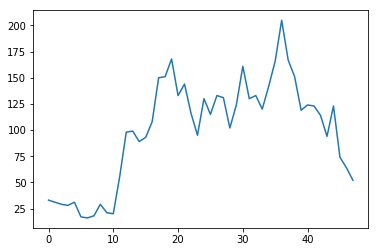

In [31]:
a4 = []
for i in range(len(L1)):
    a4.append(L1[i][68])
import matplotlib.pyplot as plt
plt.plot(a4)
plt.show()

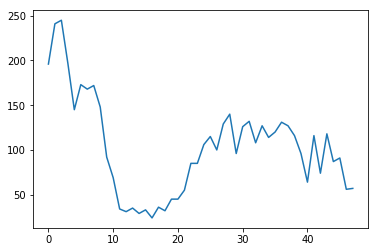

In [32]:
a4 = []
for i in range(len(L)):
    a4.append(L[i][68])
import matplotlib.pyplot as plt
plt.plot(a4)
plt.show()

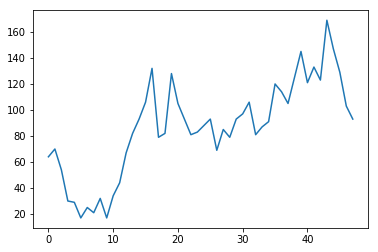

In [33]:
a4 = []
for i in range(len(L1)):
    a4.append(L1[i][79])
import matplotlib.pyplot as plt
plt.plot(a4)
plt.show()

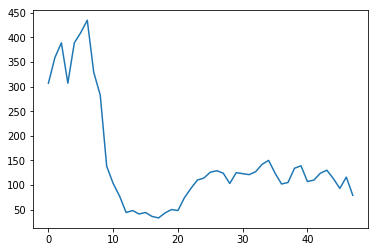

In [34]:
a4 = []
for i in range(len(L)):
    a4.append(L[i][79])
import matplotlib.pyplot as plt
plt.plot(a4)
plt.show()

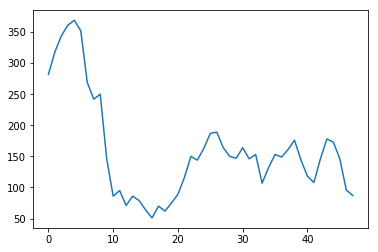

In [26]:
a4 = []
for i in range(len(L)):
    a4.append(L[i][48])
import matplotlib.pyplot as plt
plt.plot(a4)
plt.show()

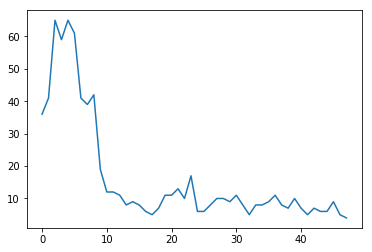

In [23]:
a4 = []
for i in range(len(L)):
    a4.append(L[i][4])
import matplotlib.pyplot as plt
plt.plot(a4)
plt.show()

In [27]:
#L = extract_time('2018-01-01',[1,30])

In [43]:
#L1 = extract_time('2018-01-01',[2,0])

In [28]:
# Visualize the picking position for the first 30 minutes
import osmnx as ox
import networkx as nx
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

In [29]:
# Mahanton, still too large.
G = ox.graph_from_place('Manhattan, New York City', network_type = 'drive')

In [30]:
# Remove unnecessary roads
Roads = list(G.edges())
# keep {'primary', 'secondary', 'tertiary', 'residential', 'trunk'} only
for r in Roads:
    key = [a for a in G.adj[r[0]][r[1]].keys()]
    proper = G.adj[r[0]][r[1]][key[0]]['highway']
    if 'motor' in proper or 'motor_link' in proper:
        G.remove_edge(r[0],r[1])
# Node list
Roads = list(G.edges())
node_list = []
for r in Roads:
    node_list.append(r[0])
    node_list.append(r[1])
node_list = set(node_list)
# remove wrong roads with (a,a)
Roads = list(G.edges)
for r in Roads:
    if r[0]==r[1]:
        G.remove_edge(r[0],r[1])
# remove duplicate roads
do = 1
while do > 0:
    store_edge = []
    Roads = list(G.edges())
    for r in Roads:
        if r in store_edge:
            G.remove_edge(r[0],r[1])
        else:
            store_edge.append(r)
    do = len(Roads)-len(G.edges())
# we need an undirected graph to find neighbors of each node
G_undir = G.to_undirected()
# remove dead end and single node
do = 1
while do > 0:
    Nodes = list(G.nodes())
    G_undir = G.to_undirected()
    for n in Nodes:
        if n not in node_list or len([a for a in G_undir.neighbors(n)]) == 1:
            G.remove_node(n)
    do = len(Nodes) - len(G)

In [41]:
# add picking up plots
G_undir = G.to_undirected()
# add node size
node_size = 15 * np.ones(len(G))
node_size = list(node_size)
# add pick up points as new nodes
for i in L.keys():
    G_undir.add_node(str(i))
    G_undir.node[str(i)]['x'] = Lo_dict[i][0]
    G_undir.node[str(i)]['y'] = Lo_dict[i][1]
    node_size.append(L[i])

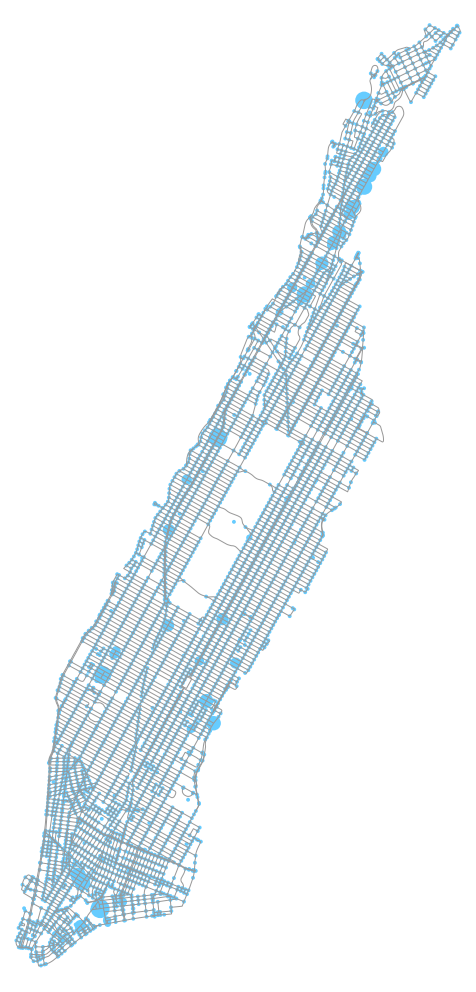

In [42]:
fig, ax = ox.plot_graph(G_undir,  fig_height=18, fig_width=None,node_size=node_size)

In [44]:
# add picking up plots
G_undir = G.to_undirected()
# add node size
node_size = 15 * np.ones(len(G))
node_size = list(node_size)
# add pick up points as new nodes
for i in L1.keys():
    G_undir.add_node(str(i))
    G_undir.node[str(i)]['x'] = Lo_dict[i][0]
    G_undir.node[str(i)]['y'] = Lo_dict[i][1]
    node_size.append(L1[i])

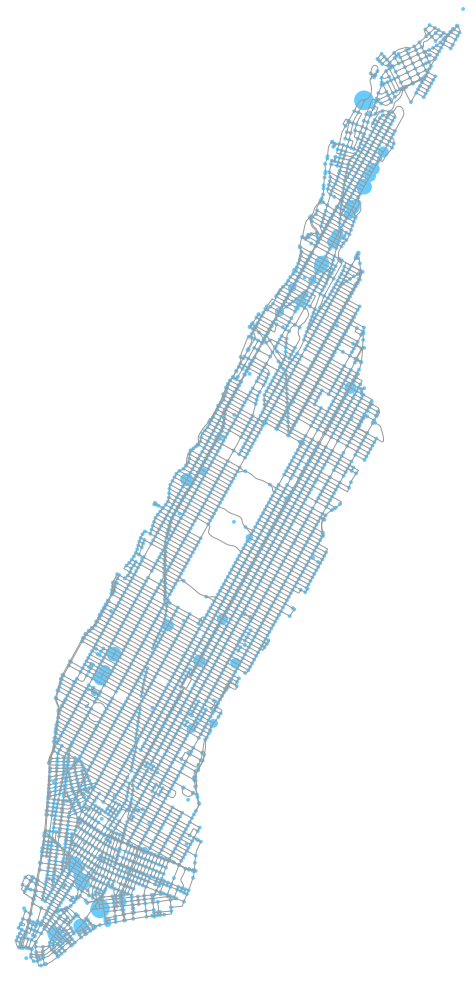

In [45]:
fig, ax = ox.plot_graph(G_undir,  fig_height=18, fig_width=None,node_size=node_size)